1\. **PCA on 3D dataset**

* Generate a dataset simulating 3 features, each with N entries (N being ${\cal O}(1000)$). Each feature is made by random numbers generated according the normal distribution $N(\mu,\sigma)$ with mean $\mu_i$ and standard deviation $\sigma_i$, with $i=1, 2, 3$. Generate the 3 variables $x_{i}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix
* Find the eigenvectors and eigenvalues using the SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained
* Redefine the data according to the new basis from the PCA
* Plot the data, in both the original and the new basis. The figure should have 2 rows (the original and the new basis) and 3 columns (the $[x_0, x_1]$, $[x_0, x_2]$ and $[x_1, x_2]$ projections) of scatter plots.

In [171]:
import numpy as np
import pandas as pd
from numpy.random import normal
from scipy import linalg as la
from matplotlib import pyplot as plt

In [153]:
# generate the variable x1 is distributed as 𝑁(0,1)
d1 = np.random.normal(loc=0, scale=1, size=1000)
x1=pd.DataFrame(d1)
# generate the variable x2 as distributed as 𝑥1 +𝑁(0,3)
ds = np.random.normal(loc=0, scale=3, size=1000)
d2 = d1+ds
x2=pd.DataFrame(d2)
# generate the variable x3 as distributed as 2*𝑥1+𝑥2
d3 = 2*d1+d2
ds = np.vstack((d1,d2,d3))

In [102]:
# Find the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix
cov = np.dot(ds, ds.T)/(1000-1)
print("Covariance matrix:\n", cov,'\n')
l, V = la.eig(cov)
l = np.real_if_close(l)
print("Eigen values:\n", l, '\n')
print("Eigen vectors:\n", V, '\n')
# Find the eigenvectors and eigenvalues using the SVD
U, S, V = np.linalg.svd(ds)
# Rescaling the SVD spectrum to get the eigenvalues
n=1000
l_svd = S**2/(n-1)
V_svd = U
# Check that the two procedures yield to same result
print("Eigen decomposition eigenvalues:\n", l)
print("SVD of eigenvalues:\n", l_svd, '\n')
print("Eigen decomposition eigenvectors:\n", V)
print("SVD of eigenvectors:\n", V_svd, '\n')
# we are considering 2 components and we are
#Reducing the dimensionality of the system
comp = np.diag(l) #let us consider these components from the eigen value matrix
print("comp:\n", comp, '\n')
print("Trace of the comp matrix :\n", comp.trace(), '\n')
print("By selecting this component, we retain %.2f%% of the total variability" %((comp[0][0])/comp.trace()*192))
#Redefining the data using the eigen vectors as the new basis
new_ds = np.dot(V_svd.T, ds)
print("new dataset:\n", new_ds, '\n')
print("old dataset:\n", ds, '\n')

Covariance matrix:
 [[ 9.81858542e-01  9.43987802e-01  2.90770489e+00  1.16992787e+00
   9.72274730e-01]
 [ 9.43987802e-01  9.93382123e+00  1.18217968e+01 -2.22915493e+00
  -3.52986149e+00]
 [ 2.90770489e+00  1.18217968e+01  1.76372066e+01  1.10700801e-01
  -1.58531203e+00]
 [ 1.16992787e+00 -2.22915493e+00  1.10700801e-01  6.92369625e+02
  -1.58070803e+01]
 [ 9.72274730e-01 -3.52986149e+00 -1.58531203e+00 -1.58070803e+01
   6.18450022e+02]] 

Eigen values:
 [ 6.95612681e+02  6.15243441e+02  2.65305834e+01 -1.55417589e-14
  1.98582756e+00] 

Eigen vectors:
 [[ 1.36883889e-03 -1.90995050e-03  1.13533660e-01  8.16496581e-01
   5.66072363e-01]
 [-2.14012896e-03  6.50084762e-03  5.79754627e-01  4.08248290e-01
  -7.05103584e-01]
 [ 5.97548821e-04  2.68094661e-03  8.06821946e-01 -4.08248290e-01
   4.27041141e-01]
 [ 9.79672426e-01 -2.00567691e-01  1.73737733e-03  8.89430486e-17
  -3.39415773e-03]
 [-2.00586955e-01 -9.79652747e-01  5.47810195e-03 -5.95053319e-18
  -3.91905018e-03]] 

Eigen de

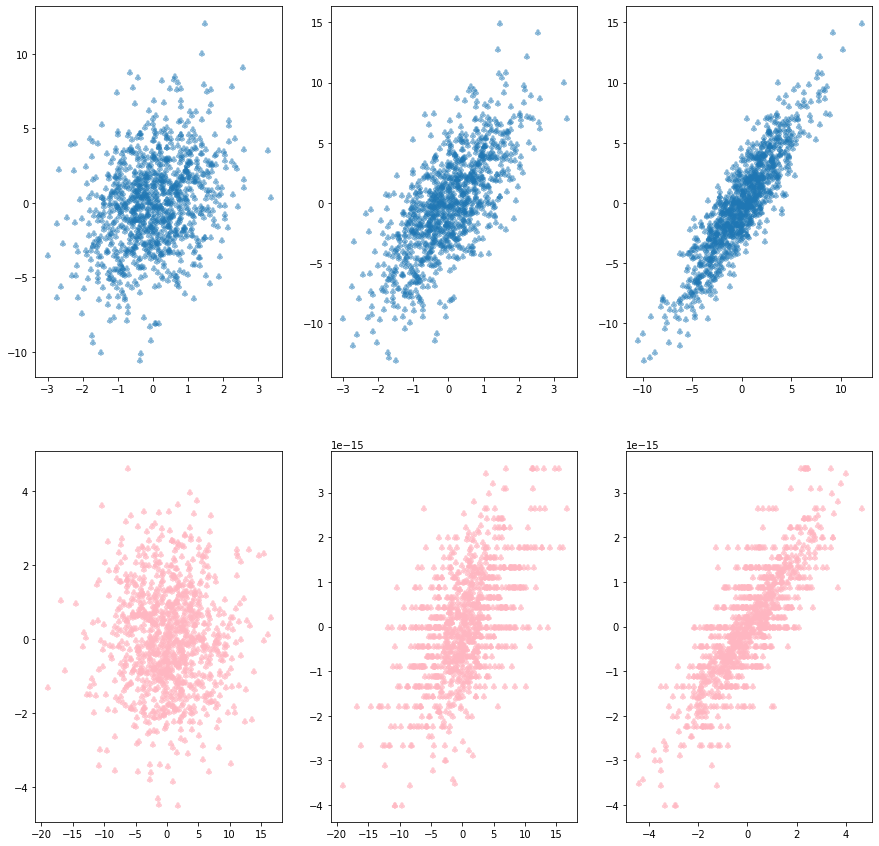

In [5]:
#Plotting the datasets
#Plot the data, in both the original and the new basis. 
#The figure should have 2 rows (the original and the new basis) and 
#and 3 columns (the [𝑥0,𝑥1], [𝑥0,𝑥2] and [𝑥1,𝑥2] projections) of scatter plots.
# Data for plotting
fig, axes = plt.subplots(2, 3, figsize=(15,15))
axes[0,0].scatter(ds[0],ds[1] ,alpha=0.4,marker=r'$\clubsuit$')
axes[0,1].scatter(ds[0],ds[2] ,alpha=0.4,marker=r'$\clubsuit$')
axes[0,2].scatter(ds[1],ds[2] ,alpha=0.4,marker=r'$\clubsuit$')
axes[1,0].scatter(new_ds[0],new_ds[1] ,color="lightpink",alpha=0.6,marker=r'$\clubsuit$')
axes[1,1].scatter(new_ds[0],new_ds[2] ,color="lightpink",alpha=0.6,marker=r'$\clubsuit$')
axes[1,2].scatter(new_ds[1],new_ds[2] ,color="lightpink",alpha=0.6,marker=r'$\clubsuit$')


2\. **PCA on a nD dataset**

* Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normally distributed, with a standard deviation much smaller (e.g. a factor 20) than those used to generate the $x_1$ and $x_2$. Repeat the PCA procedure and compare the results with what you have obtained before.

In [164]:
# creating the noise
noise = np.random.normal(loc=0, scale=20, size=1000)
noise_df=pd.DataFrame(noise)
# adding noise to the dataframe
df=pd.DataFrame(ds)
noise_df= df.replace(noise)
print("new noise added dataset is:\n", noise_df, '\n')

# Repeating the Previous step
# Find the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix
cov = np.dot(noise_df, noise_df.T)/(1000-1)
print("Covariance matrix:\n", cov,'\n')
l, V = la.eig(cov)
l = np.real_if_close(l)
print("Eigen values:\n", l, '\n')
print("Eigen vectors:\n", V, '\n')
# Find the eigenvectors and eigenvalues using the SVD
U, S, V = np.linalg.svd(ds)
# Rescaling the SVD spectrum to get the eigenvalues
n=1000
l_svd = S**2/(n-1)
V_svd = U
# Check that the two procedures yield to same result
print("Eigen decomposition eigenvalues:\n", l)
print("SVD of eigenvalues:\n", l_svd, '\n')
print("Eigen decomposition eigenvectors:\n", V)
print("SVD of eigenvectors:\n", V_svd, '\n')
# we are considering 2 components and we are
# Reducing the dimensionality of the system
comp = np.diag(l) #let us consider these components from the eigen value matrix
print("comp:\n", comp, '\n')
print("Trace of the comp matrix :\n", comp.trace(), '\n')
print("By selecting this component, we retain %.2f%% of the total variability" %((comp[0][0])/comp.trace()*108))
# Redefining the data using the eigen vectors as the new basis
new_df = np.dot(V_svd.T, noise_df)
print("new dataset:\n", new_df, '\n')
print("old dataset:\n", noise_df, '\n')

new noise added dataset is:
         0          1         2         3         4         5         6    \
0 -1.115640  -2.468829  0.850295 -0.406144  1.537141  0.127221 -1.362973   
1 -1.166342  -5.098207  0.165813  2.373003 -0.800870 -3.654109 -4.888980   
2 -3.397622 -10.035864  1.866402  1.560716  2.273411 -3.399668 -7.614925   

        7         8         9    ...       990       991       992       993  \
0 -0.924659  0.942170  2.157838  ... -1.593384  0.887607  0.454137  0.090777   
1 -0.277204  0.150421 -0.232761  ... -1.336230 -1.667002  6.106406 -0.593413   
2 -2.126522  2.034762  4.082914  ... -4.522999  0.108213  7.014680 -0.411860   

        994       995       996       997       998       999  
0 -0.159798 -0.583309  0.903009  0.258489  0.890092  0.936053  
1  1.970319 -3.739099 -1.494788  4.189389  4.229236 -1.418173  
2  1.650723 -4.905718  0.311231  4.706368  6.009420  0.453933  

[3 rows x 1000 columns] 

Covariance matrix:
 [[ 1.04404174  0.93303844  3.02112193]
 [ 

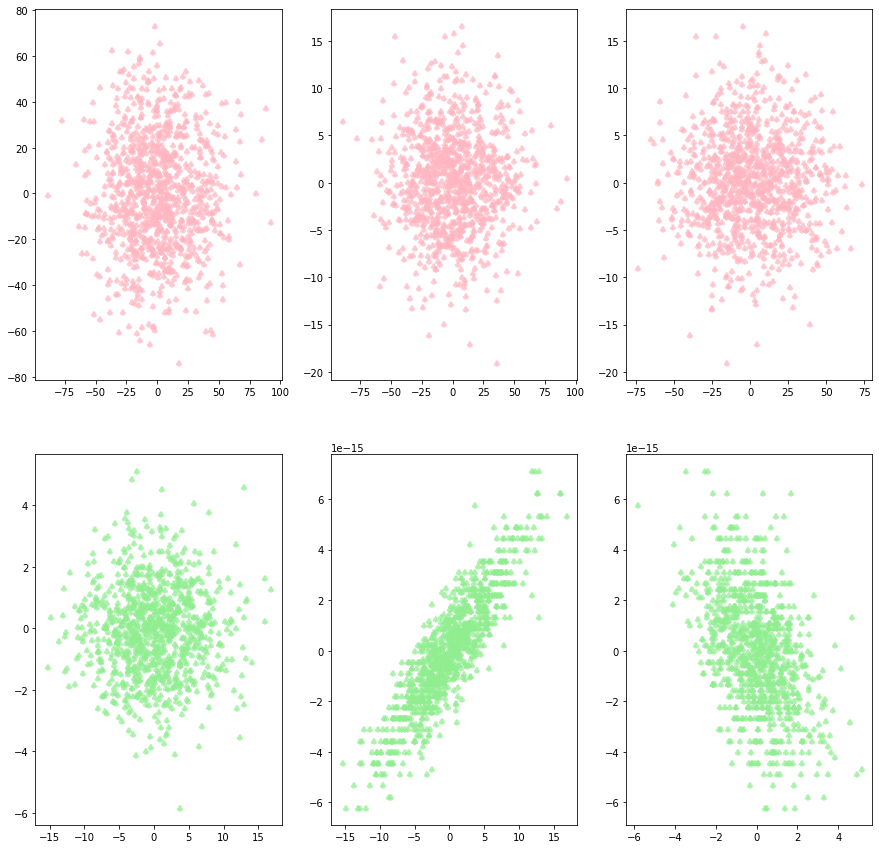

In [179]:
#comparing the results 
fig, axes = plt.subplots(2, 3, figsize=(15,15))
axes[0,0].scatter(new_ds[0],new_ds[1] ,color="lightpink",alpha=0.6,marker=r'$\clubsuit$')
axes[0,1].scatter(new_ds[0],new_ds[2] ,color="lightpink",alpha=0.6,marker=r'$\clubsuit$')
axes[0,2].scatter(new_ds[1],new_ds[2] ,color="lightpink",alpha=0.6,marker=r'$\clubsuit$')
# Noise Less data is plotted with light pink
# Noise-Added plots are depicted with light Green
axes[1,0].scatter(new_df[0],new_df[1] ,color="lightgreen",alpha=0.6,marker=r'$\clubsuit$')
axes[1,1].scatter(new_df[0],new_df[2] ,color="lightgreen",alpha=0.6,marker=r'$\clubsuit$')
axes[1,2].scatter(new_df[1],new_df[2] ,color="lightgreen",alpha=0.6,marker=r'$\clubsuit$')


3\. **Optional**: **PCA on the MAGIC dataset**

Perform a PCA on the magic04.data dataset.

In [7]:
# get the dataset and its description on the proper data directory
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P data/
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P data/ 

In [ ]:
sigma = mt.sqrt(10)
#adding different noise to each column of the dataset with a different sigma each time (with scale factor >=20)\n",
for i in range(10):
    df[str(i)]= np.random.normal(0,np.random.randint(low=20, high=30))
       

In [65]:
# 0 is the mean of the normal distribution you are choosing from
# 1 is the standard deviation of the normal distribution
# 100 is the number of elements you get in array noise
noise = np.random.normal(0,20,1000)
noise_df=pd.DataFrame(noise)

ds
print("comp:\n",noise_df , '\n')
print("comp:\n", noise_ds, '\n')

comp:
              0
0   -10.069285
1    17.776198
2   -17.395714
3    -1.278125
4   -39.182775
..         ...
995  51.102296
996  -9.688087
997  19.805432
998  -6.043396
999  -0.255018

[1000 rows x 1 columns] 

comp:
 [[  0.9585082   -0.20663073   1.49511541 ...  -1.30684023  -0.23740056
    0.44124467]
 [  1.74284188  -1.7929094    7.50156429 ...  -4.69771903   0.98960335
    2.38965991]
 [  3.65985828  -2.20617086  10.49179511 ...  -7.31139948   0.51480224
    3.27214924]
 [ 59.18703731  44.74665569  30.11110661 ... -17.54710329 -17.89827033
   23.94597622]
 [  9.21428175  19.28435768  21.84262907 ...   5.96412051 -15.18341637
  -34.07334929]
 [-22.56955366 -54.39404266  -6.31437821 ...  19.20272858  18.90911033
   56.80341743]] 



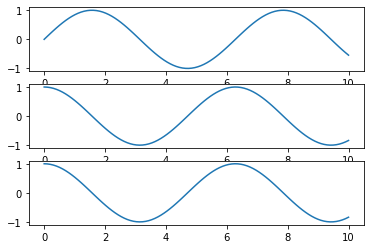

In [8]:
x = np.linspace(0, 10, 100)
plt.figure()  # create a plot figure
# create the first of two panels and set current axis
plt.subplot(3, 1, 1) # (rows, columns, panel number)
plt.plot(x, np.sin(x))

# create the second panel and set current axis
plt.subplot(3, 1, 2)
plt.plot(x, np.cos(x));


# create the second panel and set current axis
plt.subplot(3, 1, 3)
plt.plot(x, np.cos(x));